In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

f = pd.read_csv('data.csv')
vlist = np.array(f)
# f.plot(kind='scatter',x='height',y='weight')

In [5]:
X_b = np.c_[np.ones((len(vlist),1)),vlist[:,0]]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(vlist[:,1])
print(theta_best)

[2.52492461 2.02301885]


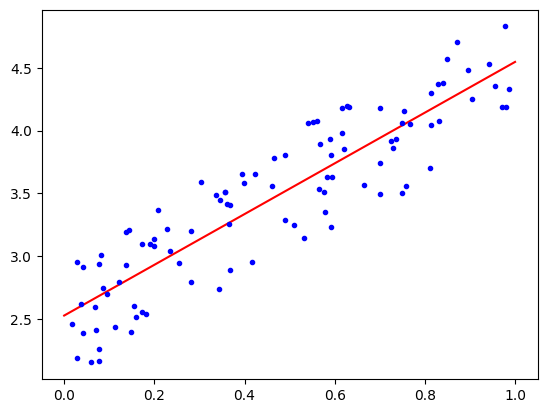

In [6]:
mat = np.c_[np.ones((2,1)),[[0],[1]]]
y = mat.dot(theta_best)

plt.plot(mat[:,1],y,"r-")
plt.plot(vlist[:,0],vlist[:,1],"b.")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(vlist[:,0].reshape(-1,1),vlist[:,1].reshape(-1,1))
print(lin_reg.intercept_, lin_reg.coef_)

[2.52492461] [[2.02301885]]


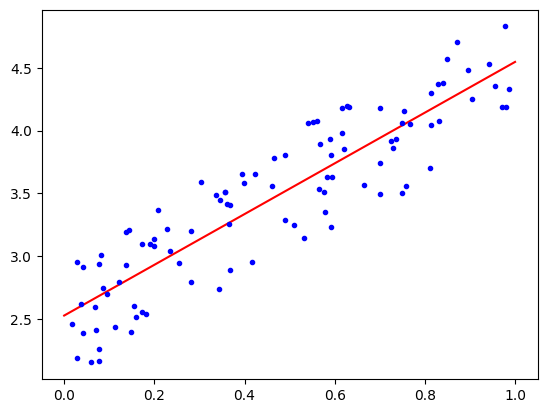

In [8]:
values0 = np.array([[0],[1]])
values1 = lin_reg.predict(values0)
plt.plot(values0,values1,"r-")
plt.plot(vlist[:,0],vlist[:,1],"b.")
plt.show()


In [9]:
print(X_b.shape)
print(y.shape)

(100, 2)
(2,)


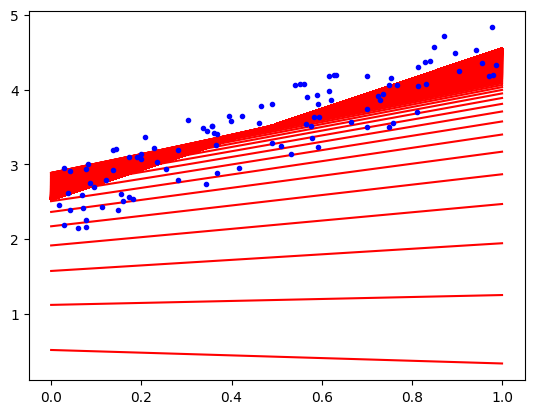

In [10]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

y_value = vlist[:,1]
y_value = y_value.reshape(-1,1)

mat = np.c_[np.ones((2,1)),[[0],[1]]]

for i in range(n_iterations):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y_value)
    theta = theta - eta*grad 
    y1 = mat.dot(theta)
    plt.plot(mat[:,1],y1,"r-")


plt.plot(vlist[:,0],vlist[:,1],"b.")
plt.show()


In [11]:
print(X_b.shape)
print(theta.shape)

(100, 2)
(2, 1)


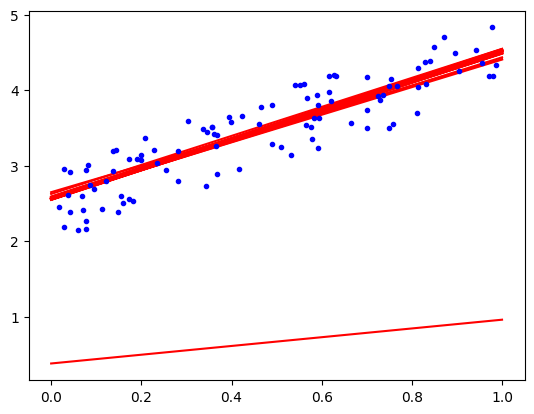

In [15]:
n_epoch = 50
t0, t1 = 5,50
m=100

def learningRate(t):
    return t0/(t+t1)

theta = np.random.rand(2,1)

for i in range(n_epoch):
    y1 = mat.dot(theta)
    plt.plot(mat[:,1],y1,"r-")
    for j in range(m):
        randIndex = np.random.randint(m)
        X_selected = X_b[randIndex:randIndex+1]
        y_selected = y_value[randIndex:randIndex+1]
        grad = 2*X_selected.T.dot(X_selected.dot(theta)-y_selected)
        theta = theta - learningRate(i*m+j)*grad

plt.plot(vlist[:,0],vlist[:,1],"b.")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curves(model,X,y):
    X_train,y_train,X_test,y_test = train_test_split(X)